In [1]:
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, RANSACRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Linear and Logistic Regression Demos

# RANSAC Image Demo

In [24]:
blob = plt.imread('data/blob.png')
height, width = blob.shape[:2]

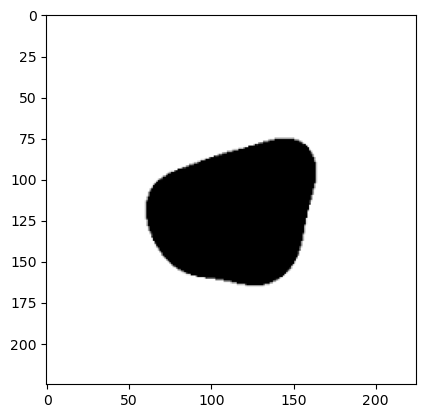

In [25]:
plt.imshow(blob)
plt.show()

In [22]:
def treshold(arr):
    arr[arr <= 0.5] = 0
    arr[arr > 0.5] = 1
    
    return arr    

In [38]:
blob = blob.ravel()
blob = treshold(blob)
np.unique(blob)

array([0., 1.], dtype=float32)

In [47]:
x = np.arange(blob.shape[0]).reshape(-1, 1)
y = blob

#### Моделиране

In [48]:
ransac = RANSACRegressor(
    estimator=LinearRegression(),
    max_trials=200,
    min_samples=0.25,
)

In [49]:
ransac.fit(x, y)

ValueError: RANSAC could not find a valid consensus set. All `max_trials` iterations were skipped because each randomly chosen sub-sample failed the passing criteria. See estimator attributes for diagnostics (n_skips*).

In [ ]:
ransac.estimator_.coef_

#### Оценка

In [50]:
ransac.estimator_.score(housing_characteristics_scaled, housing_prices)

AttributeError: 'RANSACRegressor' object has no attribute 'estimator_'

In [21]:
ransac.inlier_mask_[:10]

array([ True,  True, False, False, False,  True,  True, False,  True,
        True])

In [22]:
pd.DataFrame(ransac.inlier_mask_).value_counts()

True     380
False    126
dtype: int64

`RANSAC` е определил 377 записа като inlier-и, а останалите като outlier-и. После, е тренирал модела за inlier-ите. Затова и оценката върху всички данни (вкл и Outlier-ите) е по-ниска от преди. Нека проверим `score` само за Inlier-Ите.

Моделът оптимизира само инлайър частта от данните, моделът се научава само от тях.

In [23]:
ransac.estimator_.score(housing_characteristics_scaled[ransac.inlier_mask_], housing_prices[ransac.inlier_mask_])

0.9101991535366101

In [24]:
ransac.estimator_.score(housing_characteristics_scaled[~ransac.inlier_mask_], housing_prices[~ransac.inlier_mask_])

0.5017101995364395

#### Inliers vs outliers

In [25]:
inliers = housing[ransac.inlier_mask_]
inliers.head()

,crime_rate,zoned_land,industry,bounds_river,nox_conc,rooms,age,distance,highways,tax,pt_ratio,b_estimator,pop_status,price
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222.0,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311.0,15.2,395.60,12.43,22.9
8,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311.0,15.2,386.63,29.93,16.5


In [26]:
outliers = housing[~ransac.inlier_mask_]
outliers.head()

,crime_rate,zoned_land,industry,bounds_river,nox_conc,rooms,age,distance,highways,tax,pt_ratio,b_estimator,pop_status,price
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311.0,15.2,396.90,19.15,27.1
10,0.22489,12.5,7.87,0,0.524,6.377,94.3,6.3467,5,311.0,15.2,392.52,20.45,15.0
